In [2]:
!pip install TextBlob

In [4]:
!pip install WordCloud

In [ ]:
#import nltk
#nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [1]:
import nltk
nltk.download('stopwords')
from newspaper import Article

import requests
import pandas as pd
import numpy as np
import re, string, nltk

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk import FreqDist
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
stopwords = list(nltk.corpus.stopwords.words('english'))
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/abhimanyusingh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df = pd.read_csv('Newsdataset.csv')
df

,Unnamed: 0,Title,Text
0,0,Indian Students Canada News: Canada sees drast...,"Traditionally, Indians have been the largest c..."
1,1,IndiGo ‘langar’ on Mumbai Airport tarmac: BCAS...,"Flying to Guwahati, IndiGo Mumbai passengers l..."


In [5]:
df['Text'].iloc[1]


'Flying to Guwahati, IndiGo Mumbai passengers land in Bangladesh \'without passports\', Here\'s why\n\nTop Picks For You Fog disrupts flights: Flyers use airport apron for dining; will take steps to avoid repeat, says airline\n\nAIRPORT LOOKS LIKE TRAIN STATION\n\nScindia on flyer assaulting Indigo pilot: \'Incidences of unruly behaviour are unacceptable, will be dealt with strongly in line with existing legal provisions\'\n\nNEW DELHI: The Bureau of Civil Aviation Security ( BCAS ) has served notices to IndiGo and Mumbai International Airport Ltd (MIAL) concerning an incident where passengers of a diverted flight were seated on the tarmac and provided refreshments there. The IndiGo flight 6E2195 from Goa to Delhi, diverted to Mumbai on January 14 due to low visibility in Delhi, became the center of controversy.The situation escalated after a video showing passengers of this flight consuming refreshments on the tarmac at Mumbai Airport went viral on social.This prompted Union Aviation 

In [7]:
# length of the text
df.Text.str.len()

0    5109
1    2508
Name: Text, dtype: int64

In [9]:
# Lowercase
df['Text1']=df['Text'].str.lower()
df

,Unnamed: 0,Title,Text,Text1
0,0,Indian Students Canada News: Canada sees drast...,"Traditionally, Indians have been the largest c...","traditionally, indians have been the largest c..."
1,1,IndiGo ‘langar’ on Mumbai Airport tarmac: BCAS...,"Flying to Guwahati, IndiGo Mumbai passengers l...","flying to guwahati, indigo mumbai passengers l..."


In [11]:
# display the value of Column
df[['Text1']].values

array([['traditionally, indians have been the largest cohort among international students in canada. (photo/ agencies)\n\ndiplomatic tensions linger\n\noperational setbacks\n\nstatistics speak\n\ndominant demographic\n\nuncertain horizon\n\neconomic implications\n\nthe downturn in international student enrollment, especially from india, is poised to impact canadian universities financially, considering their annual contribution of about c$22 billion ($16.4 billion) to the economy.\n\na capital market firm cautions that restricting access for temporary workers and international students to canada could significantly hinder the nation\'s economic rebound and exacerbate recession risks. montreal-based desjardins securities forecasts a mere 0.1 percent growth in canada\'s real gdp for 2024, with an average annual increase of around 1.95 percent from 2025 to 2028.\n\nhowever, closing off entry to temporary residents could lead to a more pronounced economic downturn, with a projected decline

In [13]:
#Remove Hyperlinks
df['Text1']=df['Text1'].str.replace(r"http\S+","",regex=True)
df[['Text1']].values

array([['traditionally, indians have been the largest cohort among international students in canada. (photo/ agencies)\n\ndiplomatic tensions linger\n\noperational setbacks\n\nstatistics speak\n\ndominant demographic\n\nuncertain horizon\n\neconomic implications\n\nthe downturn in international student enrollment, especially from india, is poised to impact canadian universities financially, considering their annual contribution of about c$22 billion ($16.4 billion) to the economy.\n\na capital market firm cautions that restricting access for temporary workers and international students to canada could significantly hinder the nation\'s economic rebound and exacerbate recession risks. montreal-based desjardins securities forecasts a mere 0.1 percent growth in canada\'s real gdp for 2024, with an average annual increase of around 1.95 percent from 2025 to 2028.\n\nhowever, closing off entry to temporary residents could lead to a more pronounced economic downturn, with a projected decline

In [15]:
# Remove Punctuations
df['Text1']=df['Text1'].str.replace('[^A-Za-z0-9]+',' ', regex= True)
df[['Text1']].values

array([['traditionally indians have been the largest cohort among international students in canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications the downturn in international student enrollment especially from india is poised to impact canadian universities financially considering their annual contribution of about c 22 billion 16 4 billion to the economy a capital market firm cautions that restricting access for temporary workers and international students to canada could significantly hinder the nation s economic rebound and exacerbate recession risks montreal based desjardins securities forecasts a mere 0 1 percent growth in canada s real gdp for 2024 with an average annual increase of around 1 95 percent from 2025 to 2028 however closing off entry to temporary residents could lead to a more pronounced economic downturn with a projected decline of 0 7 percent in real gdp for 2024 and a red

In [17]:
#Remove Digits
df['Text1']=df['Text1'].str.replace(r"\d+",' ', regex= True)
df[['Text1']].values

array([['traditionally indians have been the largest cohort among international students in canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications the downturn in international student enrollment especially from india is poised to impact canadian universities financially considering their annual contribution of about c   billion     billion to the economy a capital market firm cautions that restricting access for temporary workers and international students to canada could significantly hinder the nation s economic rebound and exacerbate recession risks montreal based desjardins securities forecasts a mere     percent growth in canada s real gdp for   with an average annual increase of around     percent from   to   however closing off entry to temporary residents could lead to a more pronounced economic downturn with a projected decline of     percent in real gdp for   and a reduced annual gro

In [19]:
#Replace words
df['Text1']=df['Text1'].str.replace("indigo",'Indigo ', regex= True)
df[['Text1']].values

array([['traditionally indians have been the largest cohort among international students in canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications the downturn in international student enrollment especially from india is poised to impact canadian universities financially considering their annual contribution of about c   billion     billion to the economy a capital market firm cautions that restricting access for temporary workers and international students to canada could significantly hinder the nation s economic rebound and exacerbate recession risks montreal based desjardins securities forecasts a mere     percent growth in canada s real gdp for   with an average annual increase of around     percent from   to   however closing off entry to temporary residents could lead to a more pronounced economic downturn with a projected decline of     percent in real gdp for   and a reduced annual gro

In [21]:
#Stopwords list
from nltk.corpus import stopwords
print(", ".join(stopwords.words('english')))

i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, must

In [23]:
# Removing Stoptwords
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
df['Text1']=df['Text1'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
df[['Text1']].values

array([['traditionally indians largest cohort among international students canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications downturn international student enrollment especially india poised impact canadian universities financially considering annual contribution c billion billion economy capital market firm cautions restricting access temporary workers international students canada could significantly hinder nation economic rebound exacerbate recession risks montreal based desjardins securities forecasts mere percent growth canada real gdp average annual increase around percent however closing entry temporary residents could lead pronounced economic downturn projected decline percent real gdp reduced annual growth rate percent subsequent four years reported bloomberg news referencing study conversely randall bartlett desjardins senior director canadian economics suggests doubling intake n

In [26]:
# Spelling corrections
from textblob import TextBlob
df['Text2']= df['Text1'].apply(lambda x: str(TextBlob(x).correct()))
df[['Text2']].values

array([['traditionally indians largest short among international students canada photo agencies diplomatic tension linger operational stacks statistics speak dominant geographic uncertain horizon economic implication downturn international student enrollment especially india posed impact canadian universities financially considering annual contribution c billion billion economy capital market firm caution restricting access temporary workers international students canada could significantly hinder nation economic rebound exacerbate recession risks montreal based desjardins securities forecasts mere percent growth canada real gdp average annual increase around percent however closing entry temporary residents could lead pronounced economic downturn projected decline percent real gdp reduced annual growth rate percent subsequent four years reported bloomberg news referencing study conversely rainfall bartlett desjardins senior director canadian economics suggests doubling intake non perm

In [32]:
# length of the text after cleaning
df.Text1.str.len()

0    3927
1    1901
Name: Text1, dtype: int64

In [34]:
# Creating corpus 
corpus=df.Text1
entire_corpus_text = str( )
for i in corpus: entire_corpus_text+=str(i)

In [36]:
entire_corpus_text

'traditionally indians largest cohort among international students canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications downturn international student enrollment especially india poised impact canadian universities financially considering annual contribution c billion billion economy capital market firm cautions restricting access temporary workers international students canada could significantly hinder nation economic rebound exacerbate recession risks montreal based desjardins securities forecasts mere percent growth canada real gdp average annual increase around percent however closing entry temporary residents could lead pronounced economic downturn projected decline percent real gdp reduced annual growth rate percent subsequent four years reported bloomberg news referencing study conversely randall bartlett desjardins senior director canadian economics suggests doubling intake non perma

In [38]:
#Identifying frequency of words in corpus
FreqDist(word_tokenize(entire_corpus_text)).most_common(25)

[('students', 13),
 ('international', 11),
 ('canada', 9),
 ('indian', 9),
 ('government', 7),
 ('indigo', 7),
 ('mumbai', 7),
 ('airport', 7),
 ('diplomatic', 6),
 ('india', 6),
 ('canadian', 6),
 ('passengers', 6),
 ('flight', 6),
 ('miller', 5),
 ('minister', 5),
 ('january', 5),
 ('economic', 4),
 ('could', 4),
 ('percent', 4),
 ('study', 4),
 ('new', 4),
 ('amidst', 4),
 ('permits', 4),
 ('dip', 4),
 ('murder', 4)]

In [40]:
!pip install seaborn  

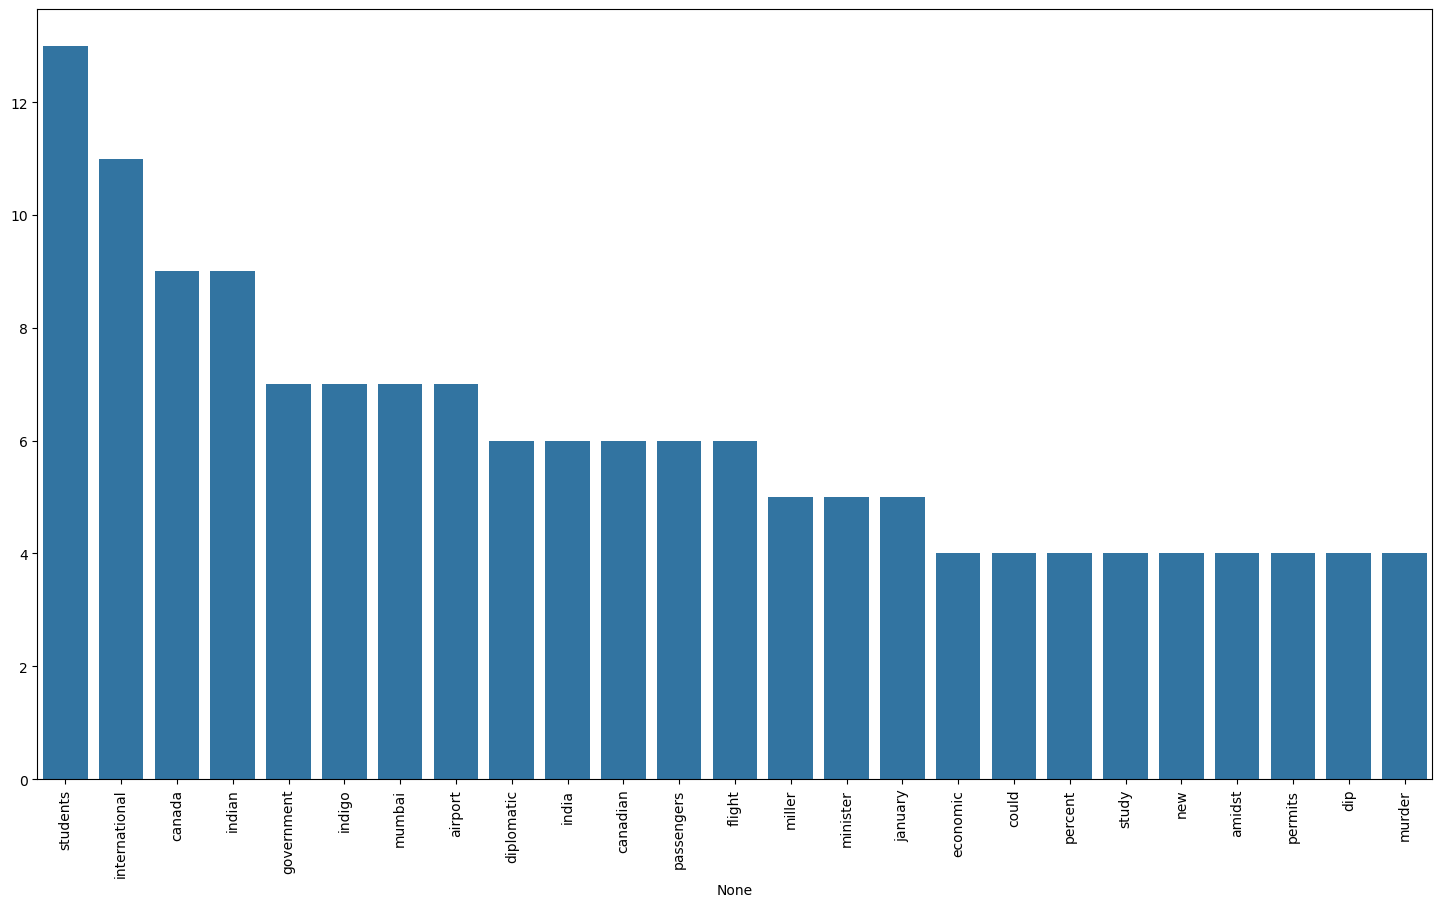

In [41]:
# Identifying most common words 

import seaborn as sns

## Creating FreqDist for whole BoW, keeping the 50 most common tokens
all_fdist = FreqDist(word_tokenize(entire_corpus_text)).most_common(25)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(18,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90);

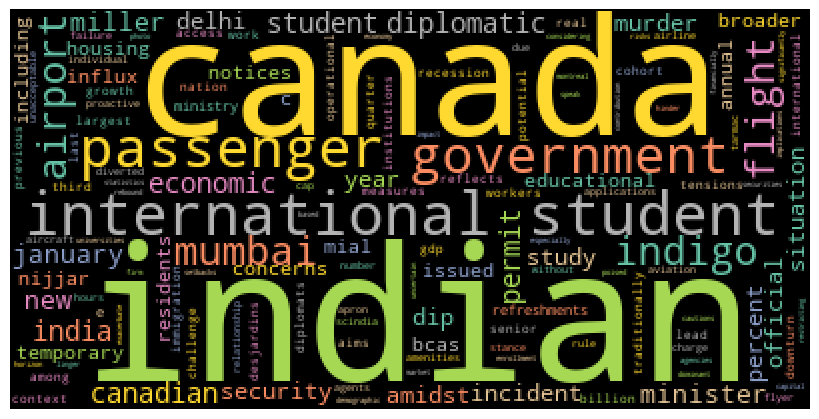

In [42]:
text = df['Text1'].values 

wordcloud = WordCloud(colormap='Set2').generate(str(text))
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

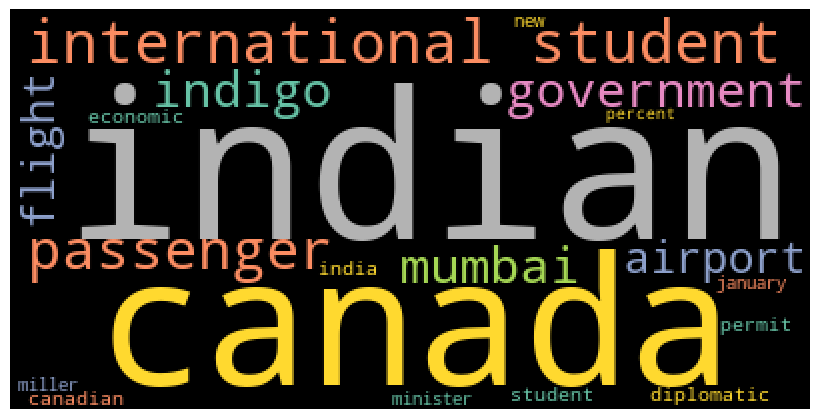

In [44]:
text = df['Text1'].values 

wordcloud = WordCloud(colormap='Set2',max_words=20).generate(str(text))
                      
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show() 

In [50]:
# Stemming 
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()
def stem_words(text):
    return " ".join([stemmer.stem(word) for word in text.split()])

df["text_stemmed"] = df["Text1"].apply(lambda text: stem_words(text))
df["text_stemmed"].values

array(['tradit indian largest cohort among intern student canada photo agenc diplomat tension linger oper setback statist speak domin demograph uncertain horizon econom implic downturn intern student enrol especi india pois impact canadian univers financi consid annual contribut c billion billion economi capit market firm caution restrict access temporari worker intern student canada could significantli hinder nation econom rebound exacerb recess risk montreal base desjardin secur forecast mere percent growth canada real gdp averag annual increas around percent howev close entri temporari resid could lead pronounc econom downturn project declin percent real gdp reduc annual growth rate percent subsequ four year report bloomberg news referenc studi convers randal bartlett desjardin senior director canadian econom suggest doubl intak non perman resid could soften anticip econom slowdown potenti avert recess broader context govern measur feder offici caution govern aggress immigr object m

In [52]:
#Lemmatization

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])

df["text_lemmatized"] = df["Text1"].apply(lambda text: lemmatize_words(text))
df[['Text1']].values


array([['traditionally indians largest cohort among international students canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications downturn international student enrollment especially india poised impact canadian universities financially considering annual contribution c billion billion economy capital market firm cautions restricting access temporary workers international students canada could significantly hinder nation economic rebound exacerbate recession risks montreal based desjardins securities forecasts mere percent growth canada real gdp average annual increase around percent however closing entry temporary residents could lead pronounced economic downturn projected decline percent real gdp reduced annual growth rate percent subsequent four years reported bloomberg news referencing study conversely randall bartlett desjardins senior director canadian economics suggests doubling intake n

# Second Iteration 

In [66]:
# Adding new stop words 
new_stopwords = ['said', 'e', 'due']
stopwords.extend(new_stopwords)

In [58]:
# Removing Stoptwords
from nltk.corpus import stopwords
stopwords=stopwords.words('english')
df['Text1']=df['Text1'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stopwords))
df[['Text1']].values

array([['traditionally indians largest cohort among international students canada photo agencies diplomatic tensions linger operational setbacks statistics speak dominant demographic uncertain horizon economic implications downturn international student enrollment especially india poised impact canadian universities financially considering annual contribution c billion billion economy capital market firm cautions restricting access temporary workers international students canada could significantly hinder nation economic rebound exacerbate recession risks montreal based desjardins securities forecasts mere percent growth canada real gdp average annual increase around percent however closing entry temporary residents could lead pronounced economic downturn projected decline percent real gdp reduced annual growth rate percent subsequent four years reported bloomberg news referencing study conversely randall bartlett desjardins senior director canadian economics suggests doubling intake n

In [62]:
# Creating corpus 
corpus=df.Text1
entire_corpus_text2 = str( )
for i in corpus: entire_corpus_text2+=str(i)

In [ ]:
#Identifying frequency of words in corpus
FreqDist(word_tokenize(entire_corpus_text2)).most_common(25)

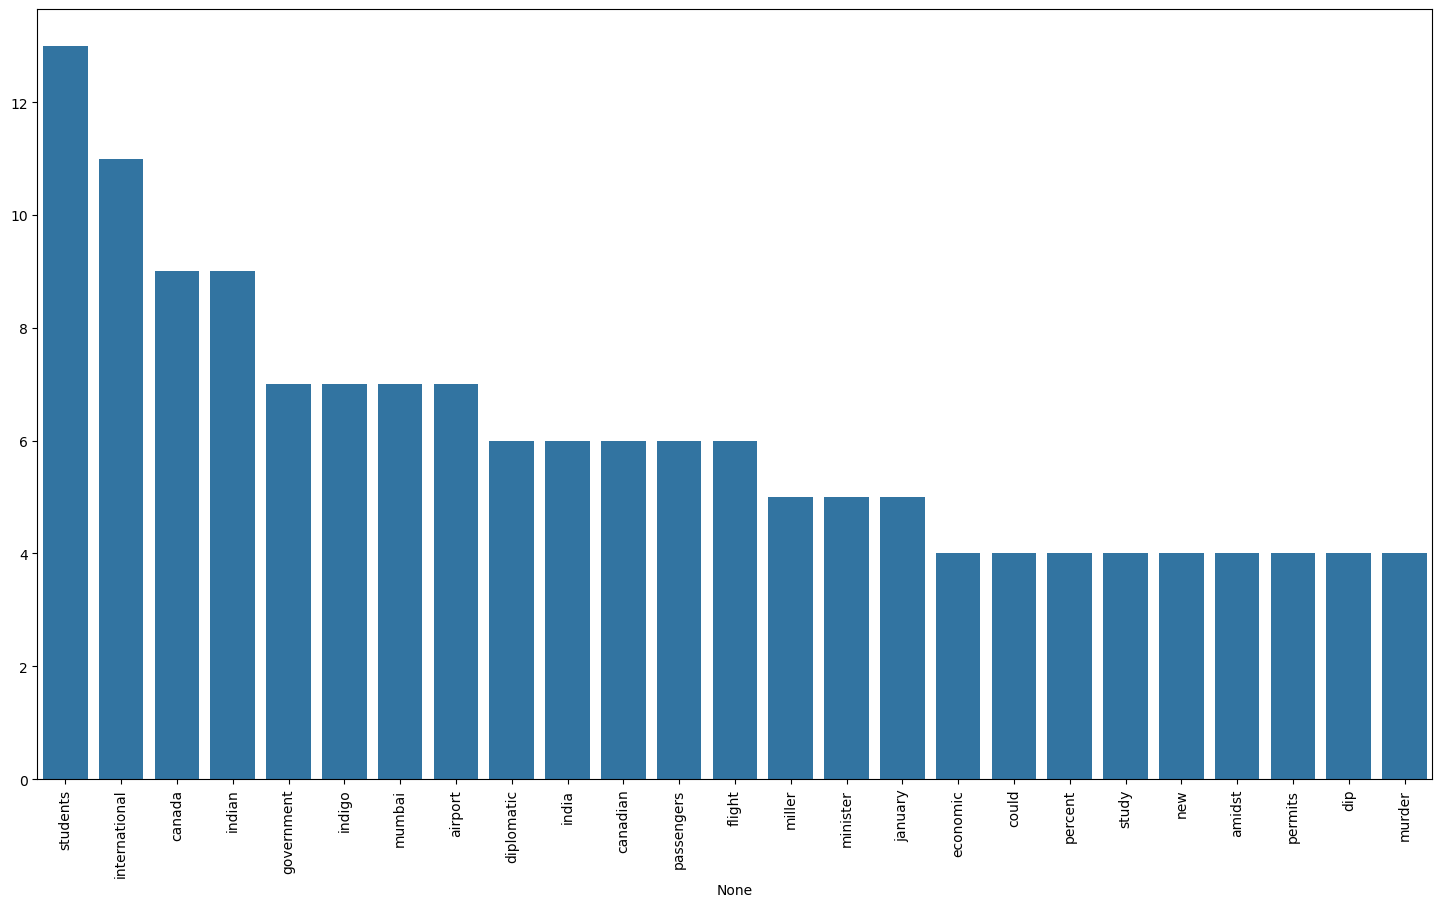

In [64]:
# Identifying most common words 

import seaborn as sns

## Creating FreqDist for whole BoW, keeping the 50 most common tokens
all_fdist = FreqDist(word_tokenize(entire_corpus_text2)).most_common(25)

## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(dict(all_fdist))

## Setting figure, ax into variables
fig, ax = plt.subplots(figsize=(18,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=90);